## Churn Rate Prediction 

##### Problem Overview
  ConnectTel Telecom Company faces the pressing need to address
customer churn, which poses a significant threat to its business
sustainability and growth.
  The company's current customer retention strategies lack precision and
effectiveness, resulting in the loss of valuable customers to competitors.
  To overcome this challenge, ConnectTel aims to develop a
robust customer churn prediction system for which you have been contacted
to handle as a Data Scientist. By leveraging advanced analytics and machine
learning techniques on available customer data, the company seeks to
accurately forecast customer churn and implement targeted retention
initiatives.
  This proactive approach will enable ConnectTel to reduce customer
attrition, enhance customer loyalty, and maintain a competitive edge in the
highly dynamic and competitive telecommunications industry.

In [1]:
# !pip install -U ydata-profiling

In [2]:
# importing useful libraies
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

#### Assessing Data

In [3]:
# Loading Dataset
data = pd.read_csv(r"C:\Users\User\Downloads\Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### Data Preprocessing 1

In [5]:
# Data shape
data.shape

(7043, 21)

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# checking dataset for anormalies and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Dropping off the customerID Column.
data = data.drop('customerID', axis=1)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
# From the dataset info above TotalCharges is denoted as object Dtype instead of float Dtype.so the Dtype has to be changed to float.
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
# checking for duplicate data
data.duplicated().sum()

22

In [11]:
# checking for missing data
missing_data = data.isnull().sum()
missing_data

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
data.isnull()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# To show the row that is having the missing values
data[data.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
# dropping the missing data
data.dropna(inplace=True)
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# statistical distribution of numerical features.
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
# statistical distribution of categorical features
data.describe(include=['object','bool'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [17]:
# checking the number of unique values of the dataset
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

#### Exploratory Data Analysis

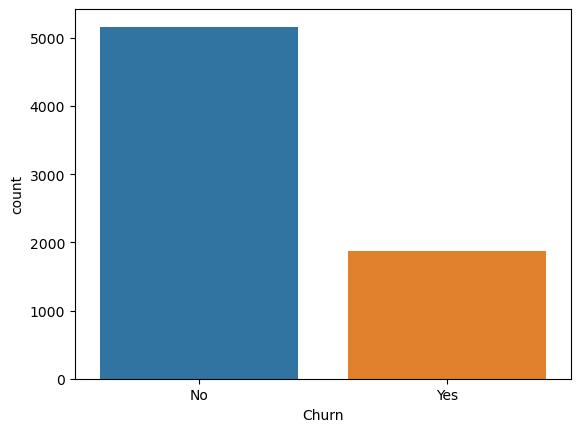

In [18]:
# countplot representation of churn customers.

sb.countplot(x='Churn', data=data,);


In [19]:
# Total number of Churn
data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

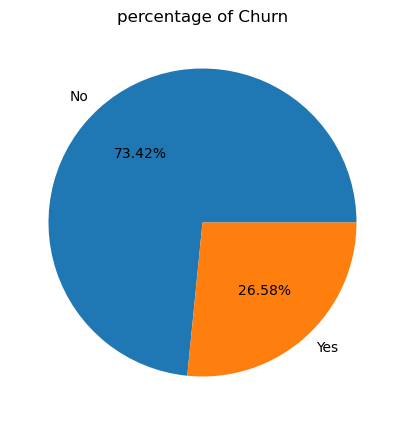

In [20]:
# Churn rate in percentage ( pie chart)

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data['Churn'])
ax.pie(count.values(),labels=count.keys(),autopct=lambda p:f'{p:.2f}%')
ax.set_title('percentage of Churn')
plt.show();

#### Observations
. This shows that more than a quarter of the total customer have churned.

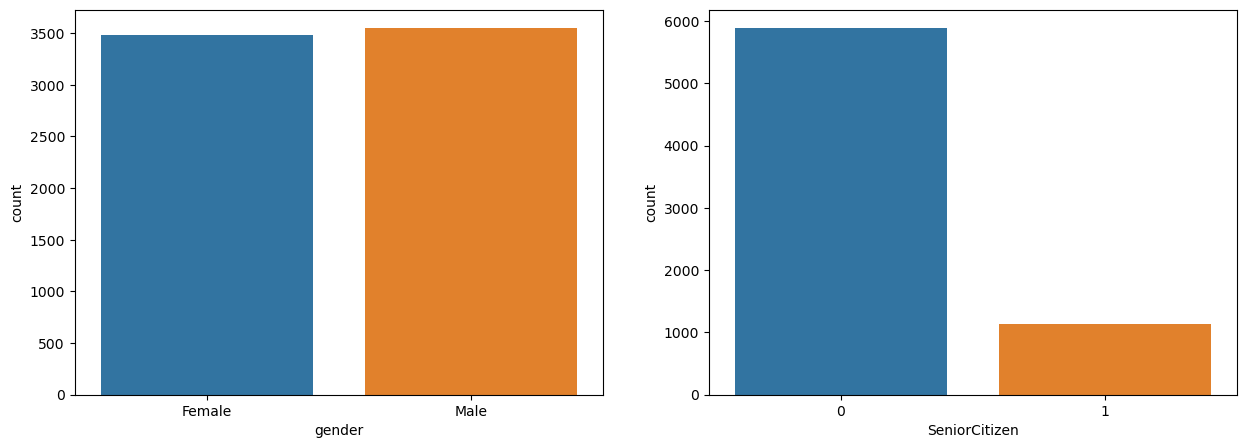

In [21]:
# countplot representation of Gender and senior citizens distribution
fig, ax = plt.subplots(1,2, figsize=(15,5))
sb.countplot(x='gender', data=data, ax=ax[0])
sb.countplot(x='SeniorCitizen', data=data, ax=ax[1]);

In [22]:
# total number of seniorcitizens and non-seniorcitizens using connectTEL services. 
data['SeniorCitizen'].value_counts()



0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [23]:
# total number of male and female using the ConnectTEL services.
data['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

#### Observations
.From the above visualization More males are using connectTEL services more than females and
its also evident that non-SeniorCitizen customers uses connectTEL services the more than the SeniorCitizen customers. 

In [24]:
#creating cat_features & num_feats for easy analysis
num_feat = data.select_dtypes(include=['float64','int64'])
cat_feat = data.select_dtypes(include=['object'])
num_feat.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


### Univariate Visualization Analysis

#### Distribution of Categorical Variables

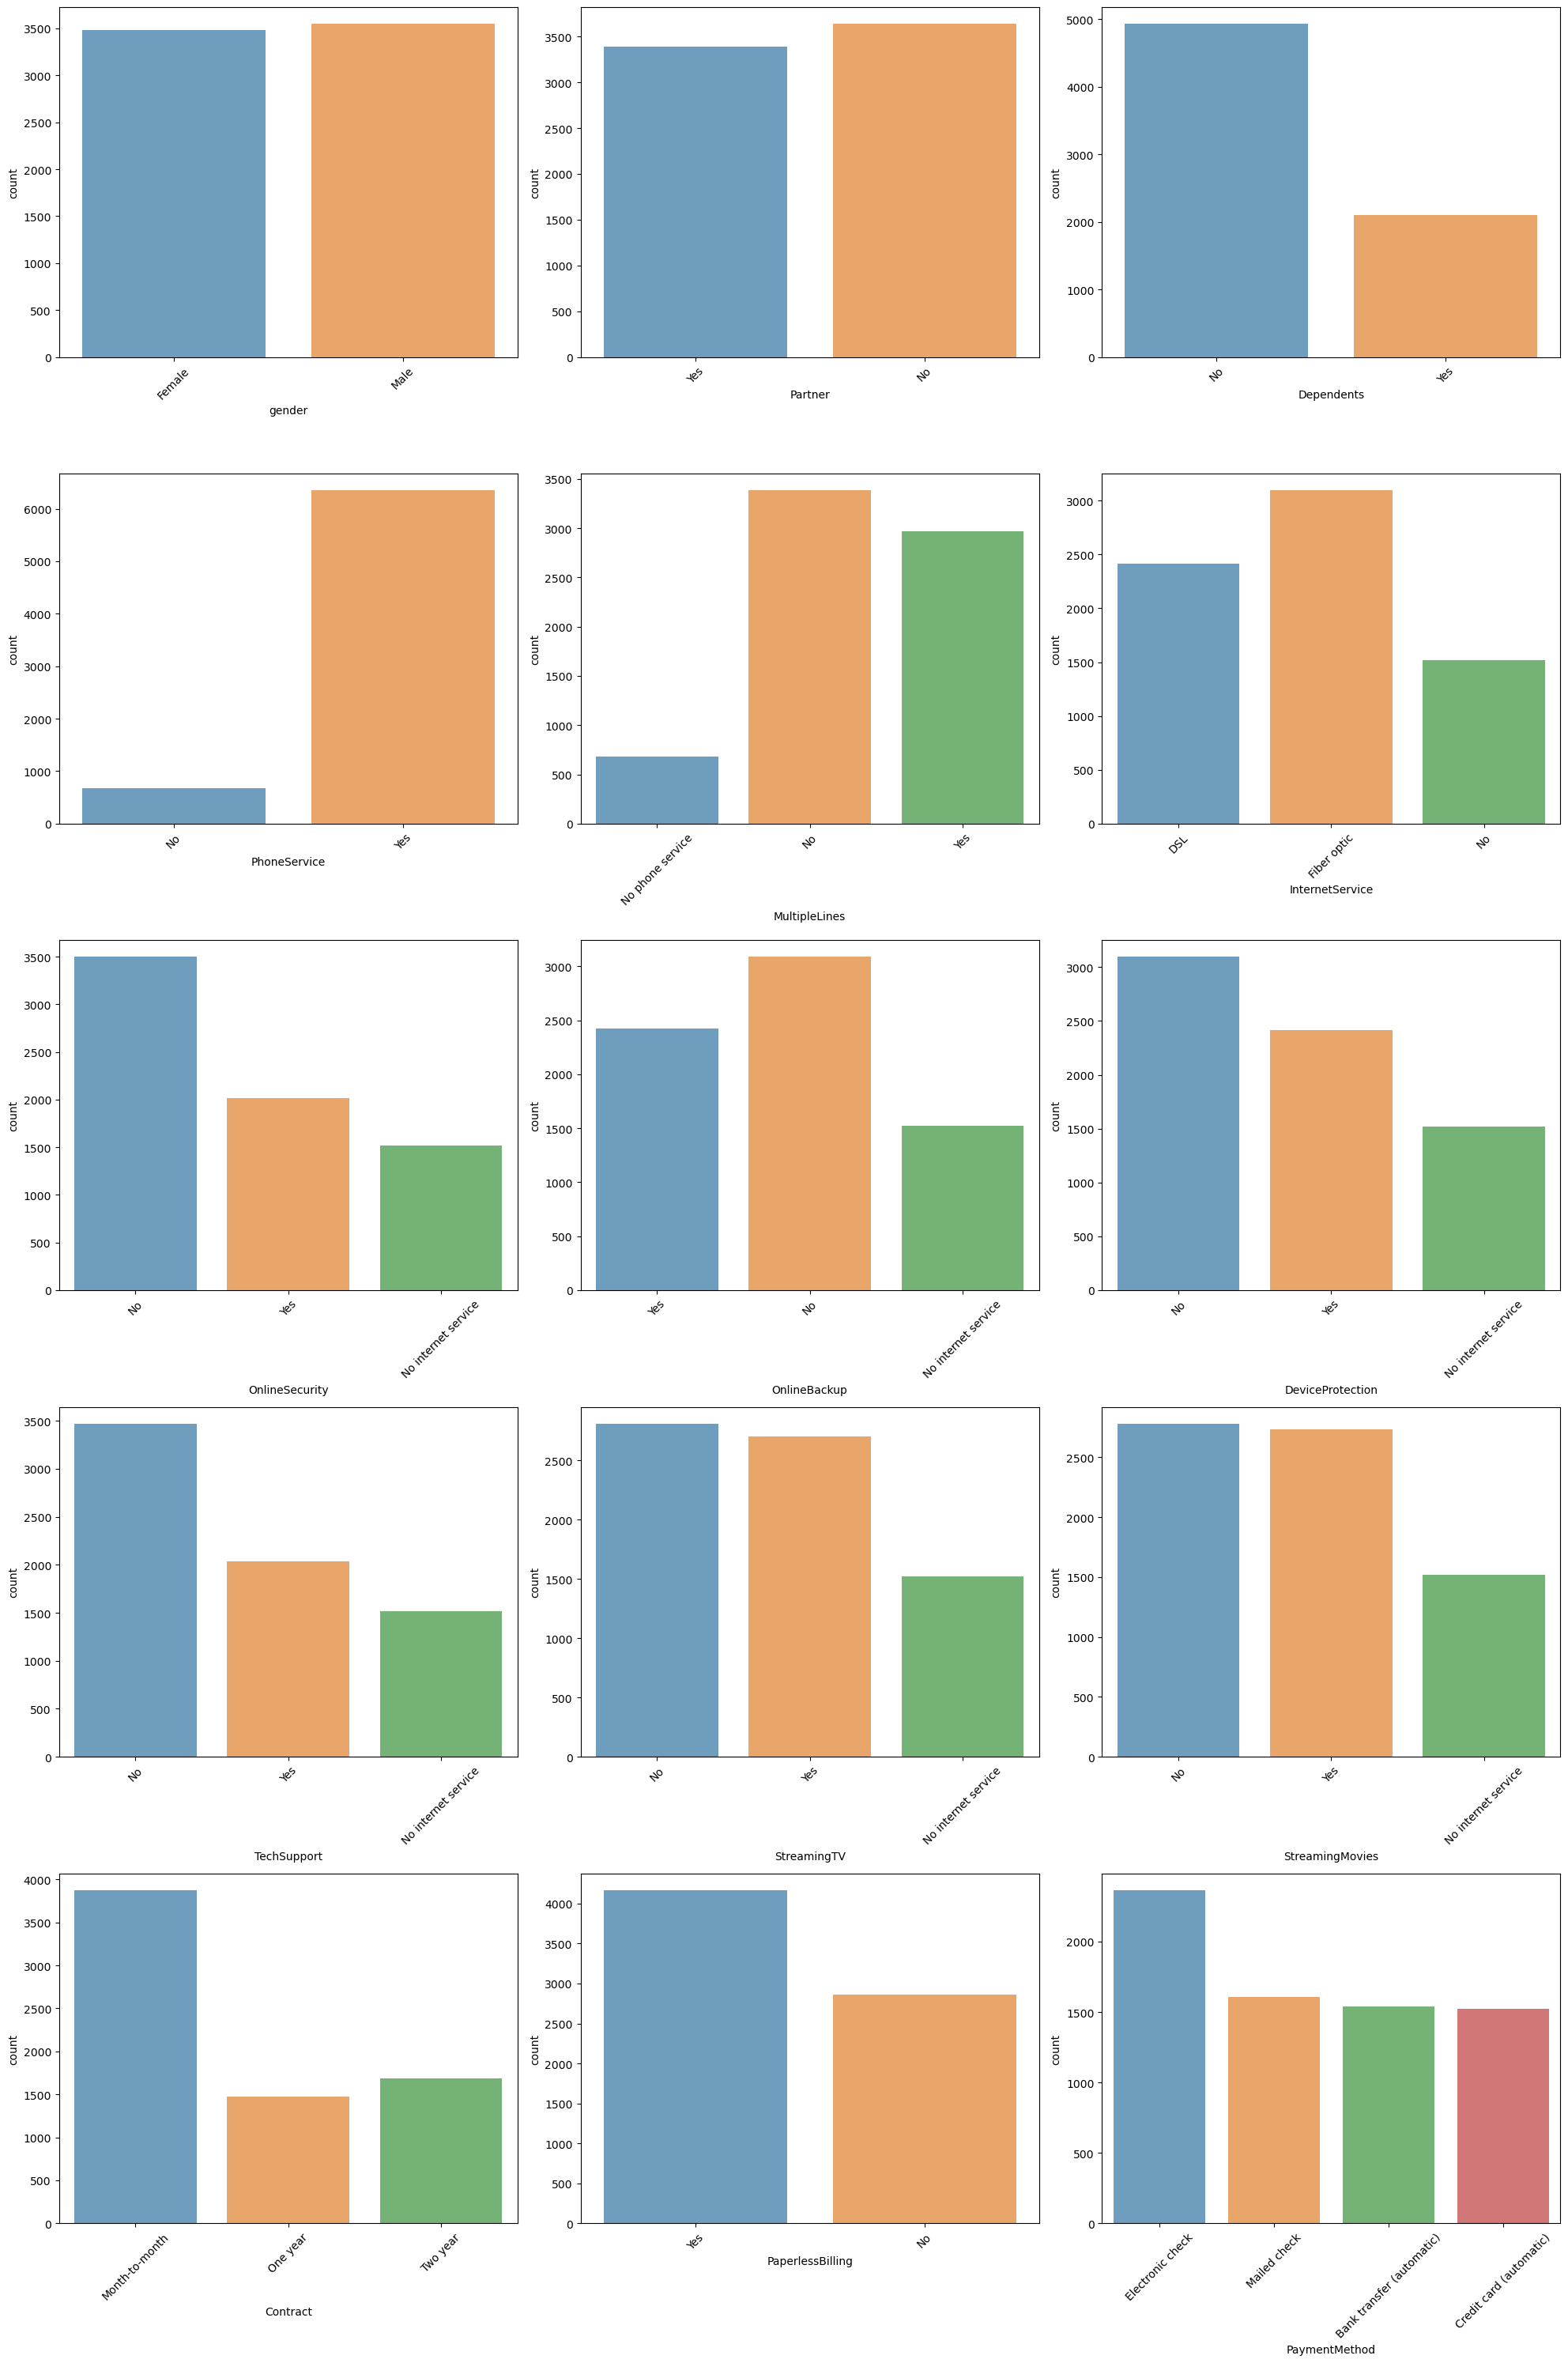

In [25]:
# univariate distribution for categorical feature
fig, axes = plt.subplots(round(len(cat_feat.columns) / 3), 3, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    if i < len(cat_feat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sb.countplot(x=cat_feat.columns[i], alpha=0.7, data=cat_feat, ax=ax)

fig.tight_layout();


#### Distribution of Numerical Variables

Text(0.5, 1.0, 'Histogram on Totalcharges')

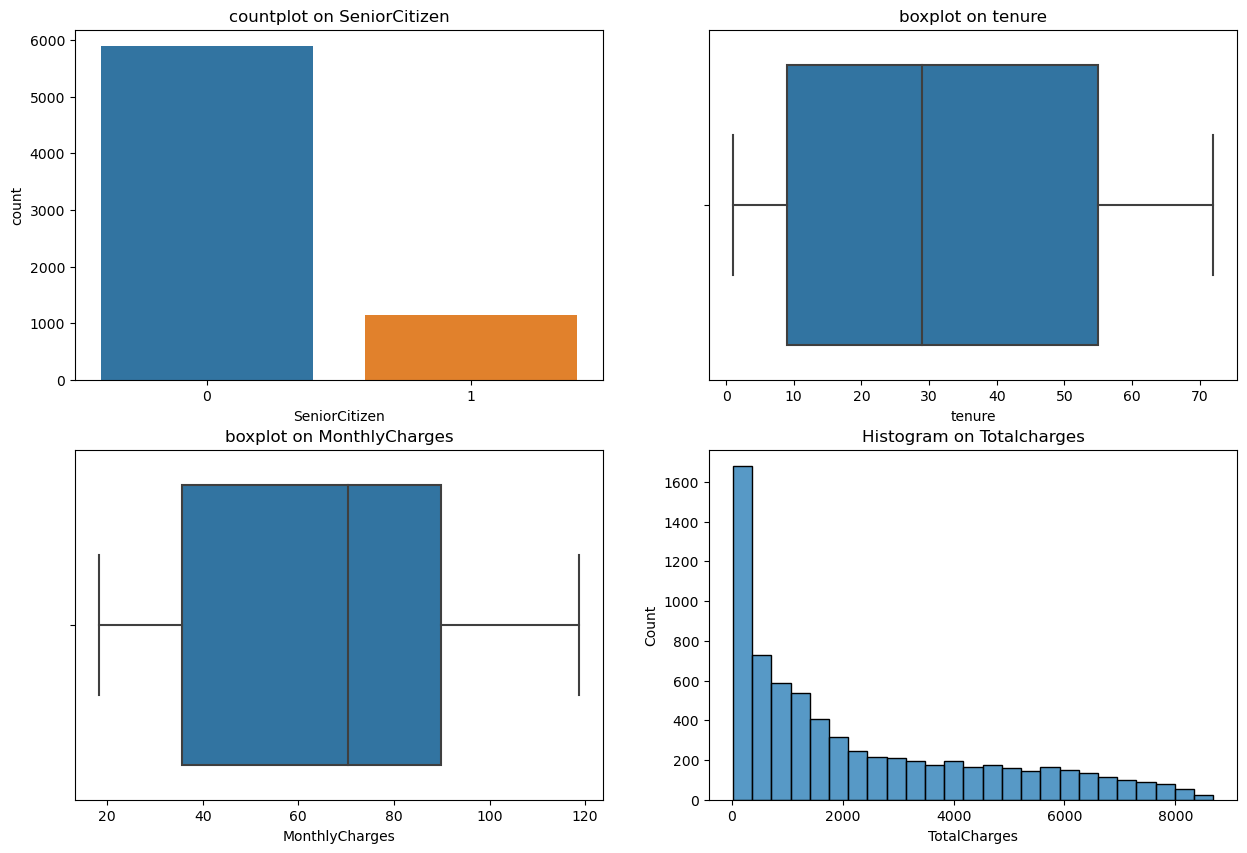

In [26]:
fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sb.countplot(x='SeniorCitizen', data=data, ax=axs[0,0])
axs[0,0].set_title('countplot on SeniorCitizen')

sb.boxplot(x='tenure', data=data, ax=axs[0,1])
axs[0,1].set_title('boxplot on tenure')

sb.boxplot(x='MonthlyCharges', data=data, ax=axs[1,0])
axs[1,0].set_title('boxplot on MonthlyCharges')

sb.histplot(x='TotalCharges', data=data, ax=axs[1,1])
axs[1,1].set_title('Histogram on Totalcharges')


### Bivariate Visualization Analysis

#### Categorical Columns.

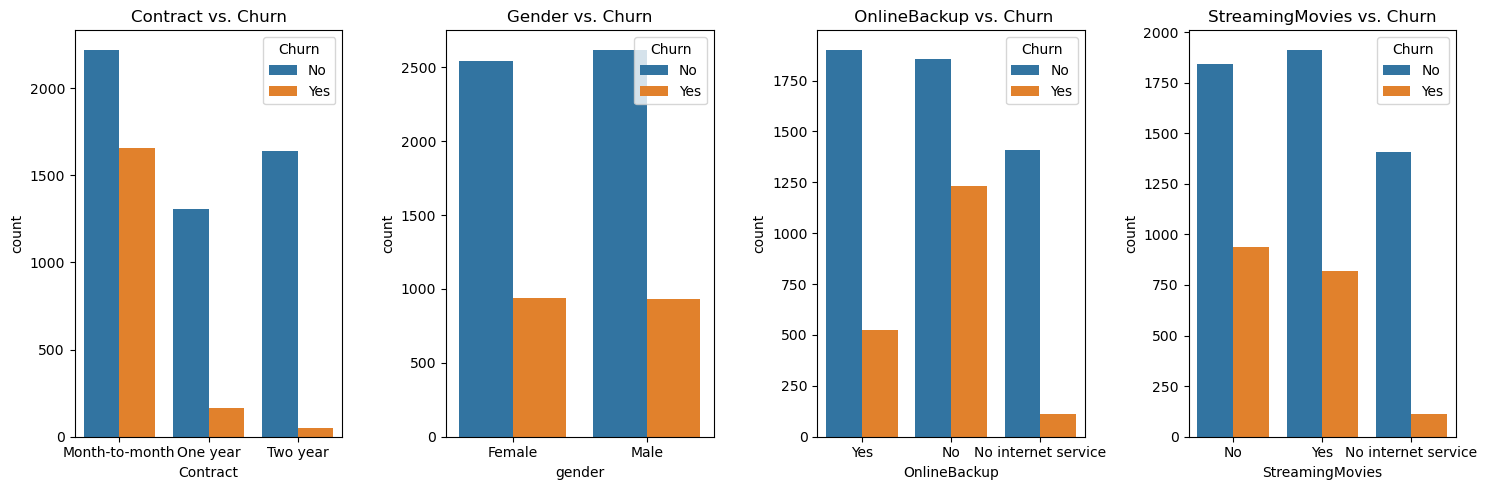

In [27]:
# Visualization using subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot for Contract vs. Churn
sb.countplot(x="Contract", hue="Churn", data=data, ax=axes[0])
axes[0].set_title("Contract vs. Churn")

# Plot for Gender vs. Churn
sb.countplot(x="gender", hue="Churn", data=data, ax=axes[1])
axes[1].set_title("Gender vs. Churn")

# Plot for Tenure vs. Churn 
sb.countplot(x="OnlineBackup", hue="Churn", data=data, ax=axes[2])
axes[2].set_title(" OnlineBackup vs. Churn")

# Plot for StreamingMovies vs. Churn 
sb.countplot(x="StreamingMovies", hue="Churn", data=data, ax=axes[3])
axes[3].set_title("StreamingMovies vs. Churn")

plt.tight_layout()
plt.show()

### Observations
Contract: The Month-to-month contract type is the most common,followed by Two Year and One year.
The Churn rate is higher for customers with Month-to-month contracts compare to longer term contracts.

Gender: The dataset contains roughly an equal number of male and female customers.
The churn rates for both genders appear similar.

OnlineBackup: Many customers do not have online backup.
Customers without online backup seem to have a higher churn rate.

StreamingMovies: Many customers subscribe to Streamingmovies services.
The churn rates appear higher for customers with these services.
.


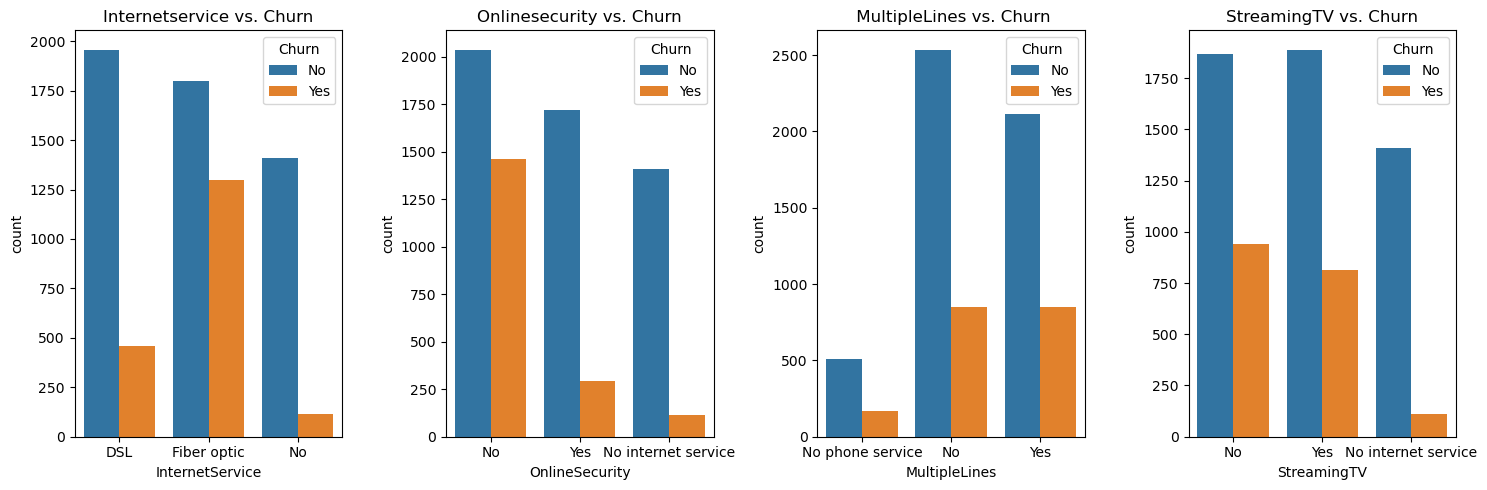

In [28]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot for InternetService vs. Churn
sb.countplot(x="InternetService", hue="Churn", data=data, ax=axes[0])
axes[0].set_title("Internetservice vs. Churn")

# Plot for OnlineSecurity vs. Churn
sb.countplot(x="OnlineSecurity", hue="Churn", data=data, ax=axes[1])
axes[1].set_title("Onlinesecurity vs. Churn")

# Plot for MultipleLines vs. Churn 
sb.countplot(x="MultipleLines", hue="Churn", data=data, ax=axes[2])
axes[2].set_title(" MultipleLines vs. Churn")
 
# Plot for StreamingTv vs. Churn 
sb.countplot(x="StreamingTV", hue="Churn", data=data, ax=axes[3])
axes[3].set_title("StreamingTV vs. Churn")


plt.tight_layout()
plt.show()

### Observations
InternetService: "Fiber optic" is the most common type of internet service, followed by "DSL."
Customers with "Fiber optic" service have a higher churn rate compared to those with "DSL."

OnlineSecurity: A significant portion of customers does not have online security.
Customers without online security appear to have a higher churn rate.

MultipleLines: Most customers have "No phone service" or a single phone line ("No" multiple lines).
The churn rate seems higher for customers with multiple lines ("Yes" multiple lines).

StreamingTV: Many customers subscribe to streaming TV services.
The churn rates appear higher for customers with these services.




#### Numerical columns

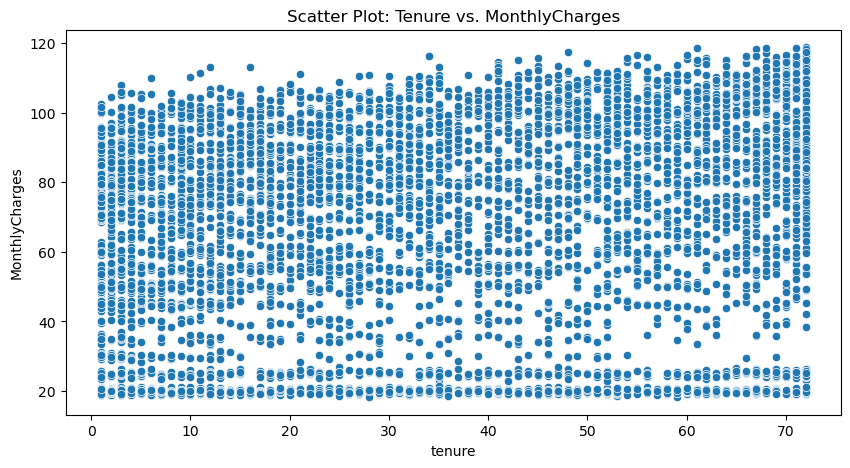

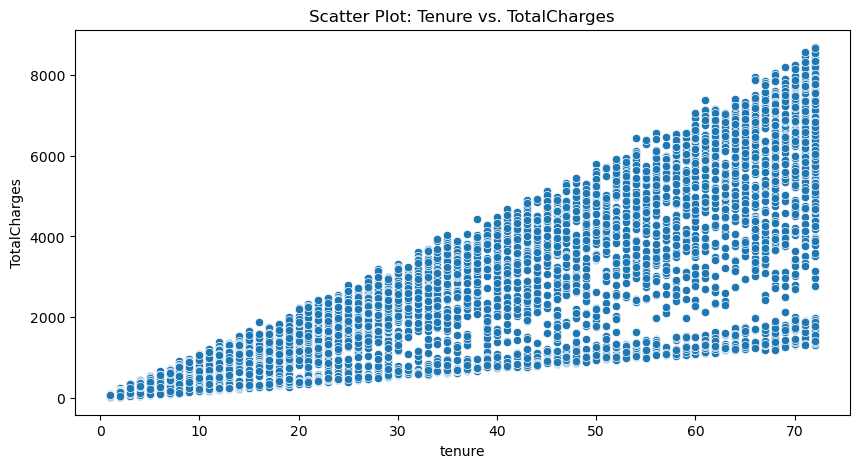

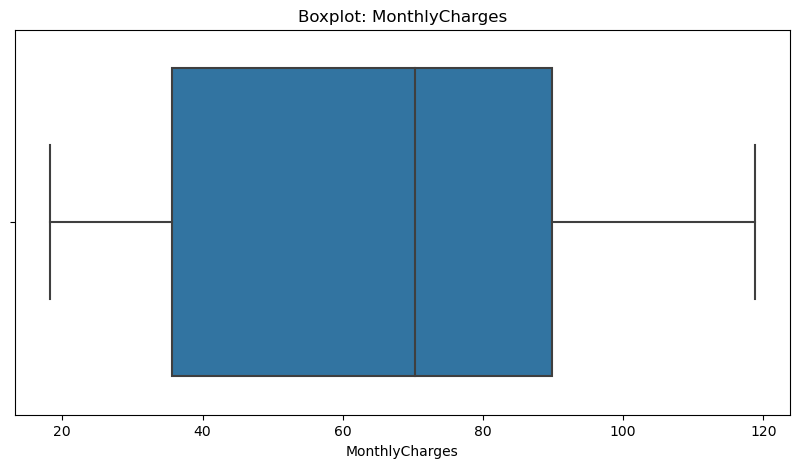

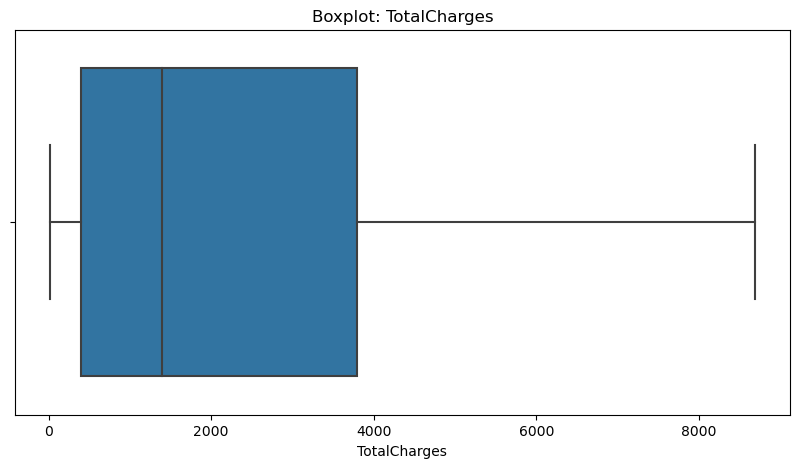

In [29]:
# Scatter plot for tenure vs. MonthlyCharges
plt.figure(figsize=(10, 5))
sb.scatterplot(x="tenure", y="MonthlyCharges", data=data)
plt.title("Scatter Plot: Tenure vs. MonthlyCharges")
plt.show()

# Scatter plot for tenure vs.TotalCharges
plt.figure(figsize=(10, 5))
sb.scatterplot(x="tenure", y="TotalCharges", data=data)
plt.title("Scatter Plot: Tenure vs. TotalCharges")
plt.show()

# Boxplot for MonthlyCharges
plt.figure(figsize=(10, 5))
sb.boxplot(x="MonthlyCharges", data=data)
plt.title("Boxplot: MonthlyCharges")
plt.show()

# Boxplot for TotalCharges
plt.figure(figsize=(10, 5))
sb.boxplot(x="TotalCharges", data=data)
plt.title("Boxplot: TotalCharges")
plt.show()

#### Observations
Tenure vs. Monthly Charges (Scatter Plot):
There appears to be no strong linear relationship between "tenure" and "MonthlyCharges." However, there is a cluster of points with lower "MonthlyCharges" values and shorter "tenure" periods.

Tenure vs. Total Charges (Scatter Plot):
There seems to be a positive correlation between "tenure" and "TotalCharges." As the "tenure" increases, "TotalCharges" generally increases.

Monthly Charges (Box Plot):
The box plot for "MonthlyCharges" shows some variability in charges, with a few outliers on the higher side. Most customers have monthly charges within a certain range, with a median value somewhere in the middle of that range.

Total Charges (Box Plot):
The box plot for "TotalCharges" reveals a wider range of values. There are customers with relatively low "TotalCharges," while others have much higher "TotalCharges." The presence of outliers suggests some customers with exceptionally high "TotalCharges."




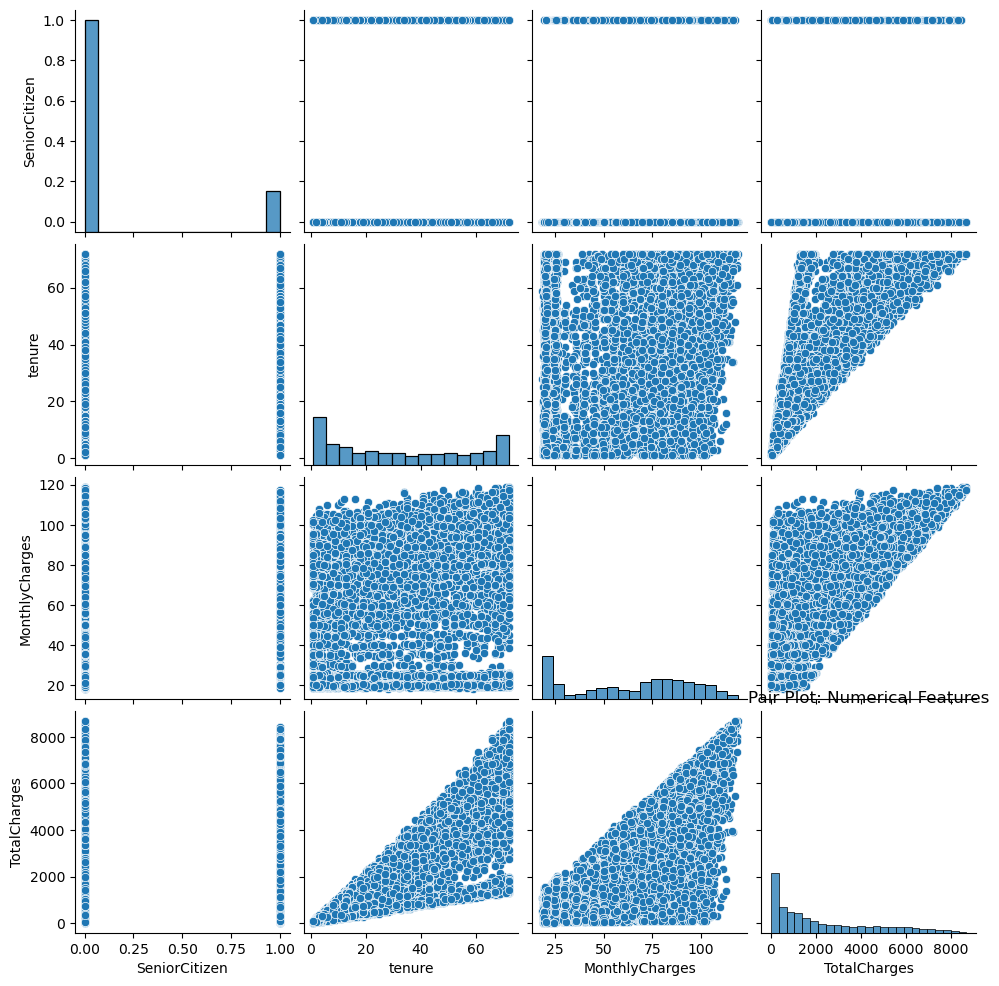

In [30]:
# Pair plot for all numerical features
sb.pairplot(data)
plt.title("Pair Plot: Numerical Features")
plt.show()

### Multivariate Analysis

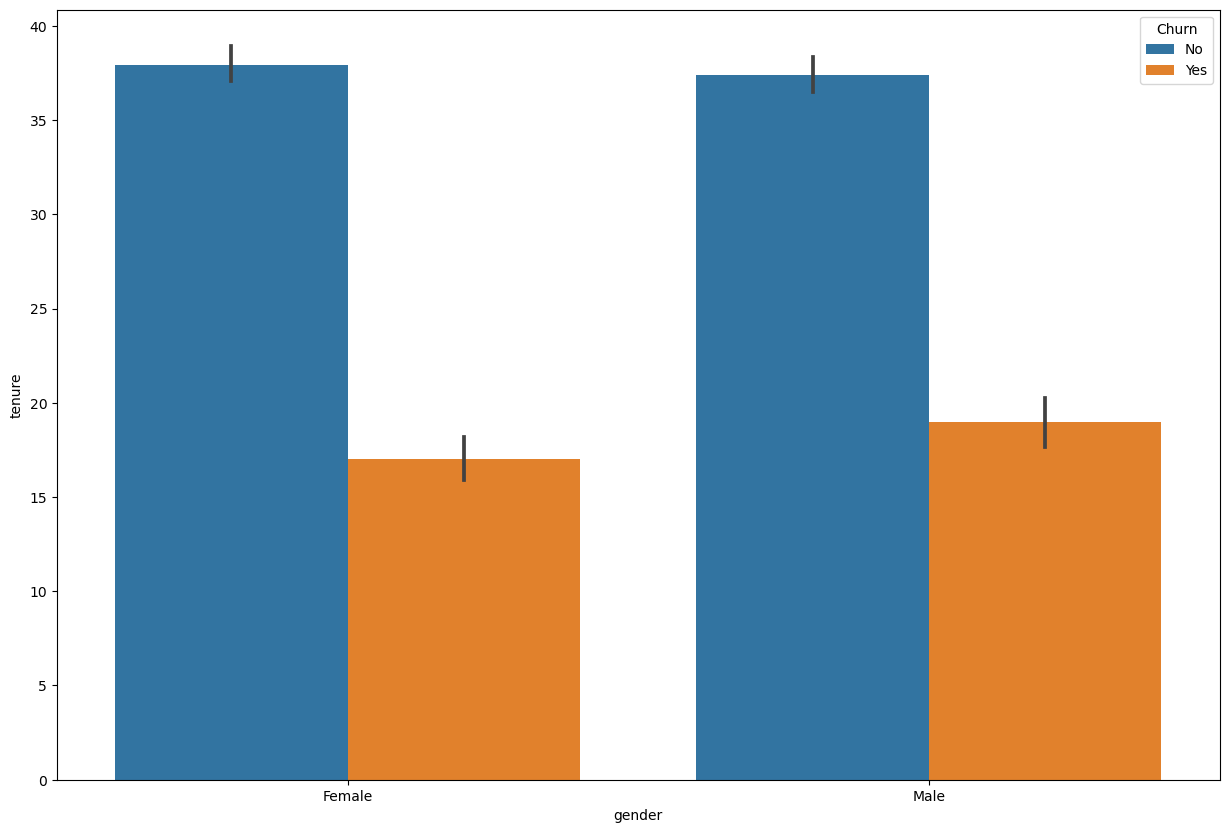

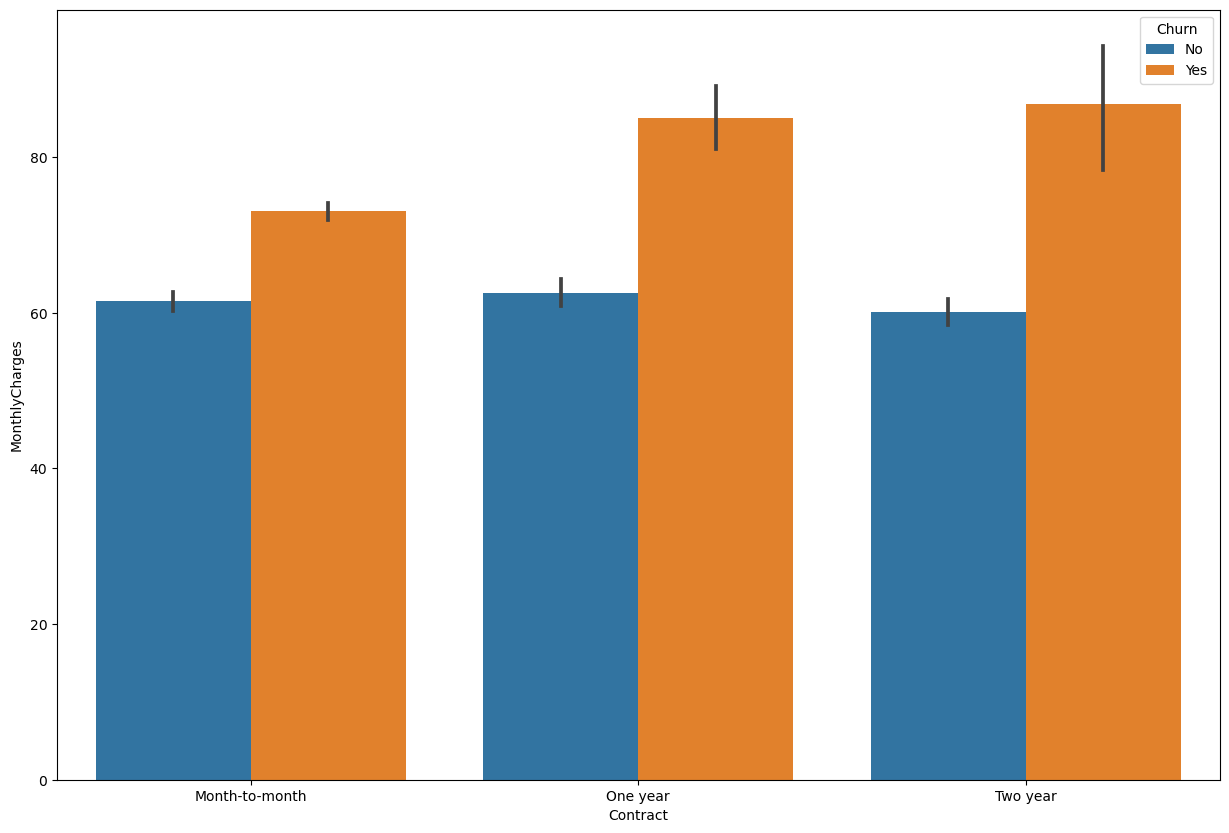

In [31]:
# Customer Tenure, gender, and Churn
plt.figure(figsize=(15,10))
sb.barplot(x='gender', y='tenure',data=data, hue='Churn')

# Customer Monthlycharges,contract and Churn
plt.figure(figsize=(15,10))
sb.barplot(y='MonthlyCharges', x='Contract',data=data, hue='Churn');

### Observation
Customer Tenure, Gender, and Churn:

The first bar plot compares the tenure of customers based on their gender and churn status.
It appears that in both gender categories (Male and Female), customers who have churned tend to have lower tenure compared to those who have not churned.
This suggests that customers with shorter tenures are more likely to churn, regardless of their gender.

Customer Monthly Charges, Contract, and Churn:
The second bar plot examines the relationship between monthly charges, contract type, and churn.
For month-to-month contracts, customers who have churned generally have higher monthly charges compared to those who have not churned. This suggests that customers with higher monthly charges are more likely to churn when on month-to-month contracts.
For one-year and two-year contracts, there is less variation in monthly charges between those who churned and those who did not. This could indicate that customers on longer-term contracts are less sensitive to monthly charges.

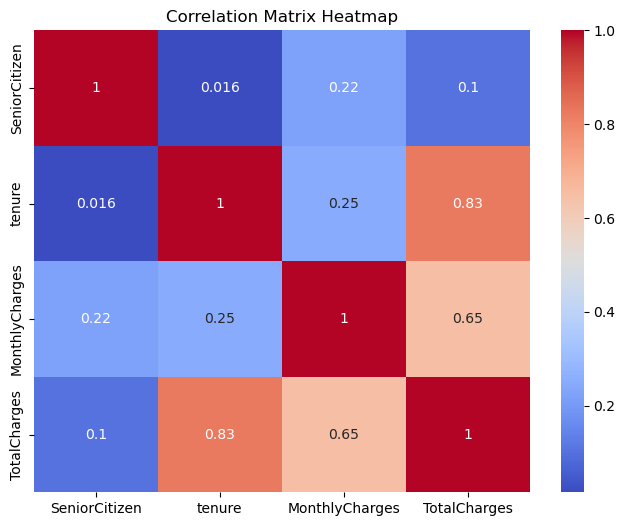

In [32]:
# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Observations
Tenure vs. Monthly Charges (Correlation: ~0.25): There is a weak positive correlation between "tenure" and "MonthlyCharges." This means that, on average, customers with longer tenures tend to have slightly higher monthly charges, but the correlation is not very strong.

Tenure vs. Total Charges (Correlation: ~0.83): There is a strong positive correlation between "tenure" and "TotalCharges." This indicates that as customers stay with the telecom service for a longer time (higher tenure), their total charges also tend to increase significantly.

Monthly Charges vs. Total Charges (Correlation: ~0.65): There is a moderate positive correlation between "MonthlyCharges" and "TotalCharges." This suggests that customers with higher monthly charges tend to accumulate higher total charges, but the correlation is not extremely strong.










### Data Processing part 2

In [36]:
# data2 = data.head()


In [38]:
data.isna().sum()
# no missing data 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Removing Outliers using IQR

In [39]:

# Columns containing outliers to be removed

column_name = ["TotalCharges","MonthlyCharges"]

def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return cleaned_data

cleaned_data = remove_outliers_iqr(data, column_name)

# Display the DataFrame after removing outliers
#print(cleaned_data)


#### Label Encoding

In [40]:
# Dataset where Dtype is object
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [41]:
from sklearn import preprocessing
# loop over each column in the data where Dtype is object

for col in data.select_dtypes(include=['object']).columns:
    
    # initializing LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # fit the encoder to the unique value in the column
    label_encoder.fit(data[col].unique())
    
    # Transform the column using the encoder
    data[col] = label_encoder.transform(data[col])
    
    # print the column name and the unique encoder values
    print(f"{col}: {data[col].unique()}")
    

gender: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [1 0 2]
InternetService: [0 1 2]
OnlineSecurity: [0 2 1]
OnlineBackup: [2 0 1]
DeviceProtection: [0 2 1]
TechSupport: [0 2 1]
StreamingTV: [0 2 1]
StreamingMovies: [0 2 1]
Contract: [0 1 2]
PaperlessBilling: [1 0]
PaymentMethod: [2 3 0 1]
Churn: [0 1]


In [42]:
# merging cat_feat and num_feat into one  data frame
data2 = pd.concat([cat_feat, num_feat],axis=1)
data2.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0,1,29.85,29.85
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,34,56.95,1889.50
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,2,53.85,108.15
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0,45,42.30,1840.75
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0,2,70.70,151.65


In [43]:
# segmention of data into features and target label
col =data.drop('Churn', axis=1)
target = data['Churn']

In [44]:
# encode the categorical dataset
col = pd.get_dummies(col,drop_first=True,dtype='int64')
col

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [45]:
# scaling the dataset using Robust scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
col = pd.DataFrame(scaler.fit_transform(col),columns=col.columns)
col
# now the data is well scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.0,0.0,1.0,0.0,-0.608696,-1.0,0.0,-1.0,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,0.0,-0.746200,-0.403038
1,0.0,0.0,0.0,0.0,0.108696,0.0,-0.5,-1.0,0.5,-0.5,0.5,-0.5,-0.5,-0.5,1.0,-1.0,1.0,-0.246891,0.145000
2,0.0,0.0,0.0,0.0,-0.586957,0.0,-0.5,-1.0,0.5,0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,1.0,-0.304007,-0.379963
3,0.0,0.0,0.0,0.0,0.347826,-1.0,0.0,-1.0,0.5,-0.5,0.5,0.5,-0.5,-0.5,1.0,-1.0,-2.0,-0.516813,0.130633
4,-1.0,0.0,0.0,0.0,-0.586957,0.0,-0.5,0.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,0.0,0.006449,-0.367144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,1.0,1.0,-0.108696,0.0,0.5,-1.0,0.5,-0.5,0.5,0.5,0.5,0.5,1.0,0.0,1.0,0.266237,0.174764
7028,-1.0,0.0,1.0,1.0,0.934783,0.0,0.5,0.0,-0.5,0.5,0.5,-0.5,0.5,0.5,1.0,0.0,-1.0,0.605251,1.758008
7029,-1.0,0.0,1.0,1.0,-0.391304,-1.0,0.0,-1.0,0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,0.0,-0.750806,-0.309737
7030,0.0,1.0,1.0,0.0,-0.543478,0.0,0.5,0.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,1.0,0.074620,-0.321480


Text(0.5, 1.0, 'feature importance plot')

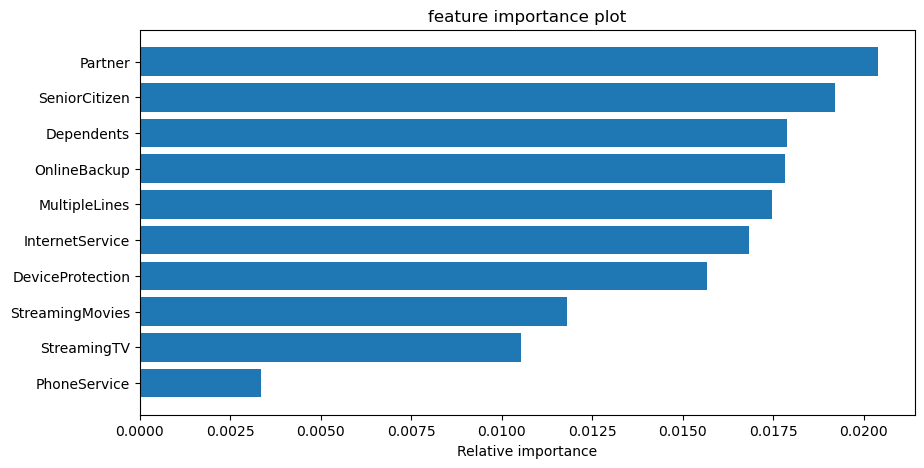

In [46]:
# checking for important features that led to  customer Churn.
from sklearn.ensemble import RandomForestRegressor

feat_im = RandomForestRegressor()
feat_im.fit(col,target)
feat_name = list(col.columns)
importances = feat_im.feature_importances_
indices = np.argsort(importances)[:10]

plt.figure(figsize=(10,5))
plt.barh(range(len(indices)),importances[indices],align='center')
plt.yticks(range(len(indices)),[feat_name[i] for i in indices])
plt.xlabel("Relative importance")
plt.title("feature importance plot")

In [47]:
#splitting data into training and evaluation dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(col,target,test_size=0.33,random_state=42)
X_test.shape

(2321, 19)

#### Building A Base Model

In [61]:
from sklearn.linear_model import LinearRegression #ols
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
#instantiating our classifier models
lr_mod = LogisticRegression()
gb_mod = GaussianNB()
rf_mod = RandomForestClassifier()
dt_mod = DecisionTreeClassifier()

#fitting and training our classifier models
lr_mod.fit(X_train,y_train)
gb_mod.fit(X_train,y_train)
rf_mod.fit(X_train,y_train)
dt_mod.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
#creating  predictions
pred_lr = lr_mod.predict(X_test)
pred_gb = gb_mod.predict(X_test)
pred_rf = rf_mod.predict(X_test)
pred_dt = dt_mod.predict(X_test)

####  Model Evaluation

In [68]:
#printing out the model accuracy score of our classifier
lr_score = lr_mod.score(X_test,y_test)
gb_score = gb_mod.score(X_test,y_test)
rf_score = rf_mod.score(X_test,y_test)
dt_score = dt_mod.score(X_test,y_test)

print(f"model accurcay score for Logistic Regression is: {lr_score}")
print(f"model accurcay score for Naive bayes is {gb_score}:")
print(f"model accurcay score for RandomForestClassifier is: {rf_score}")
print(f"model accurcay score for DecisionTreeClassifier is: {dt_score}")

model accurcay score for Logistic Regression is: 0.8035329599310642
model accurcay score for Naive bayes is 0.7522619560534253:
model accurcay score for RandomForestClassifier is: 0.7854373115036622
model accurcay score for DecisionTreeClassifier is: 0.7134855665661353


In [69]:
# importing evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
#classification report for logistic regression
print(f"model accurcay score for Logistic Regression is: {lr_score}\n")
print("Logistic Regression Model Report: \n ",classification_report(y_test,pred_lr))

model accurcay score for Logistic Regression is: 0.8035329599310642

Logistic Regression Model Report: 
                precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.65      0.54      0.59       610

    accuracy                           0.80      2321
   macro avg       0.75      0.72      0.73      2321
weighted avg       0.79      0.80      0.80      2321



In [71]:
# helpful function to plot out a confussion matrix

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sb.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

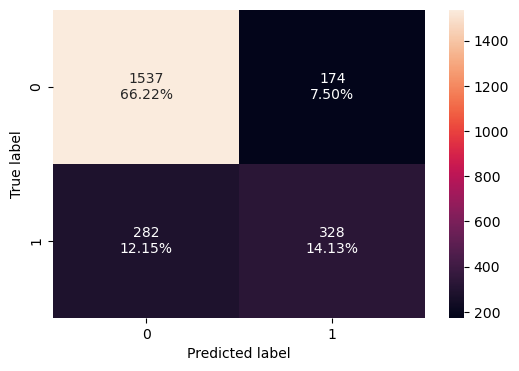

In [72]:
confusion_matrix_sklearn(lr_mod,X_test,y_test)

In [73]:
# classification report for Naive bAYES
print(f"model accurcay score for Naive bayes is {gb_score}:")
print("Naive bayes Model Report: \n ",classification_report(y_test,pred_gb))

model accurcay score for Naive bayes is 0.7522619560534253:
Naive bayes Model Report: 
                precision    recall  f1-score   support

           0       0.89      0.76      0.82      1711
           1       0.52      0.74      0.61       610

    accuracy                           0.75      2321
   macro avg       0.71      0.75      0.71      2321
weighted avg       0.79      0.75      0.76      2321



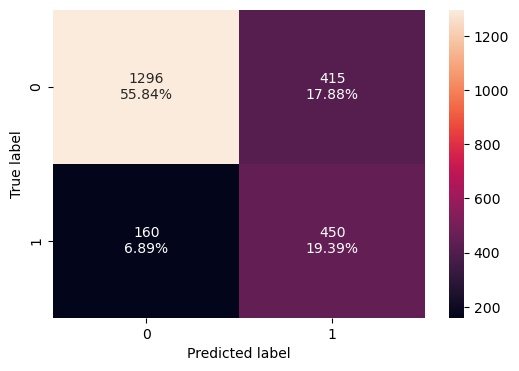

In [74]:
confusion_matrix_sklearn(gb_mod,X_test,y_test)

In [75]:
# classification report for RandomForestClassifier
print(f"model accurcay score for RandomForestClassifier is {rf_score}:")
print("RandomForestClassifier Model Report: \n ",classification_report(y_test,pred_rf))

model accurcay score for RandomForestClassifier is 0.7854373115036622:
RandomForestClassifier Model Report: 
                precision    recall  f1-score   support

           0       0.83      0.89      0.86      1711
           1       0.62      0.49      0.54       610

    accuracy                           0.79      2321
   macro avg       0.72      0.69      0.70      2321
weighted avg       0.77      0.79      0.78      2321



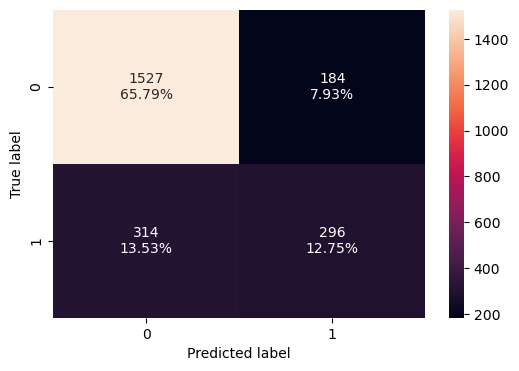

In [76]:
confusion_matrix_sklearn(rf_mod,X_test,y_test)

In [77]:
# classification report for  DecisionTreeClassifier
print(f"model accurcay score for  DecisionTreeClassifier is {dt_score}:")
print(" DecisionTreeClassifier Model Report: \n ",classification_report(y_test,pred_dt))

model accurcay score for  DecisionTreeClassifier is 0.7134855665661353:
 DecisionTreeClassifier Model Report: 
                precision    recall  f1-score   support

           0       0.82      0.79      0.80      1711
           1       0.46      0.51      0.48       610

    accuracy                           0.71      2321
   macro avg       0.64      0.65      0.64      2321
weighted avg       0.72      0.71      0.72      2321



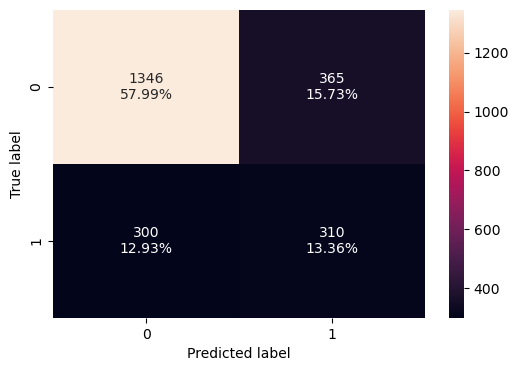

In [78]:
confusion_matrix_sklearn(dt_mod,X_test,y_test)

### Observations
Logistic Regression: Achieved the highest accuracy score among the models, indicating that it has the best overall performance in predicting customer churn based on the given dataset.

Random Forest Classifier: Also performed well, with a reasonably high accuracy score.

Naive Bayes: Achieved a good accuracy score but slightly lower than Logistic Regression and Random Forest.

Decision Tree Classifier: Had the lowest accuracy score among the models evaluated, suggesting that it may not perform as well as the other models for this specific prediction task.

### Conclusion
If the primary goal is to maximize accuracy in predicting customer churn, then Logistic Regression should be the preferred model in this context.

It's important to note that accuracy is just one metric, and there may be other factors to consider, such as the cost of false positives and false negatives. For example, incorrectly classifying a loyal customer as a churned customer (false positive) may have different implications and costs compared to failing to identify an actual churned customer (false negative).

To prevent customer churn in the future, I proferred the following strategies to ConnectTEL Telecomm Company:

##### Customer Retention Programs:
Identify at-risk customers early and implement targeted retention programs, such as special offers, discounts, or personalized services, to motivate them to stay.

##### Improved Customer Service:
Enhance the quality of customer service to address customer issues and concerns promptly. Satisfied customers are less likely to churn.

##### Data-Driven Insights: 
Continuously analyze customer data to identify patterns and trends associated with churn. Use this information to develop proactive strategies.

##### Predictive Analytics:
Utilize advanced predictive models, like the one i have experimented with, to forecast churn risk for individual customers. This allows for customized retention efforts.

##### Feedback Mechanisms:  
Implement feedback mechanisms to collect customer feedback and act on it to improve services.

##### Competitive Analysis: 
Keep an eye on competitors and their offerings to ensure your services remain competitive in the market.

##### Long-Term Contracts: 
Encourage customers to sign long-term contracts or loyalty programs, which can reduce the likelihood of churn.